## 콘크리트 데이터셋 도전

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)에서 `Concrete_Data.xls`를 다운로드


### 1. 데이터 탐색 및 전처리

* 데이터 적재

In [1]:
import pandas as pd
concrete = pd.read_excel('datasets/Concrete_Data.xls')
concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


* **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* **Age** -- quantitative -- Day (1~365) -- Input Variable
* **Concrete compressive strength** -- quantitative -- MPa -- Output Variable 

* columns를 단순한 이름으로 변경

In [2]:
concrete.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

* 앞의 2행 확인하기

In [3]:
concrete.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


* 뒤에 2행 확인하기

In [4]:
concrete.tail(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


* 통계치 살펴보기

In [5]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


* 누락 정보 확인하기

In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

* 각 열의 평균값 확인하기

In [8]:
concrete.mean()

cement          281.165631
slag             73.895485
ash              54.187136
water           181.566359
superplastic      6.203112
coarseagg       972.918592
fineagg         773.578883
age              45.662136
strength         35.817836
dtype: float64

* slag 열의 데이터 분포 확인하기

In [9]:
concrete['slag']

0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: slag, Length: 1030, dtype: float64

* 위의 수치 데이터로는 특잇값을 한눈에 알아보기 어려우므로 plot으로 확인

<AxesSubplot:>

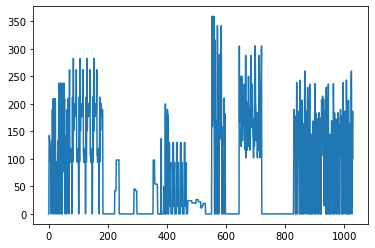

In [10]:
concrete['slag'].plot()

* slag 데이터 값 중 300을 넘어가는 값이 확인됨
* value_counts를 통해 초과되는값이 10개 있음을 알 수 있음

In [11]:
(concrete['slag'] > 300).value_counts()

False    1020
True       10
Name: slag, dtype: int64

In [12]:
tmp = concrete['slag'] > 300
tmp

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: slag, Length: 1030, dtype: bool

In [13]:
tmp.value_counts()

False    1020
True       10
Name: slag, dtype: int64

* boxplot으로 보다 편리하게 outlier 확인하기

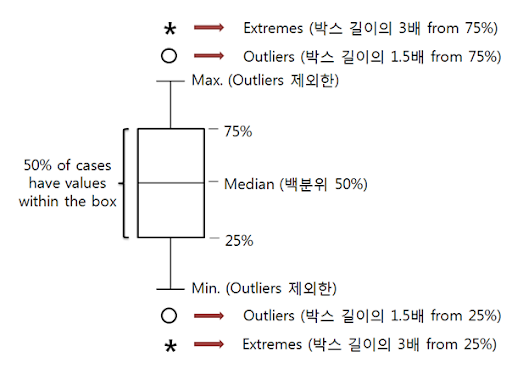

In [14]:
from IPython.display import Image
Image(filename='boxplot.png', width=400)

* boxplot() 함수는 이상치(플라이어(flier)라고 부름)를 감지하고 수염 부분에 이를 포함시키지 않음
* 1사분위가  𝑄1 이고 3사분위가  𝑄3 이라면 사분위수 범위는  𝐼𝑄𝑅=𝑄3−𝑄1 (이 값이 박스의 높이) 
* 𝑄1−1.5×𝐼𝑄𝑅  보다 낮거나  𝑄3+1.5×𝐼𝑄𝑅  보다 높은 점수는 이상치로 간주

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x256395e24c0>,
 'caps': [<matplotlib.lines.Line2D at 0x256395e2b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x256395e2160>],
 'medians': [<matplotlib.lines.Line2D at 0x256395ec280>],
 'fliers': [<matplotlib.lines.Line2D at 0x256395ec5e0>],
 'means': []}

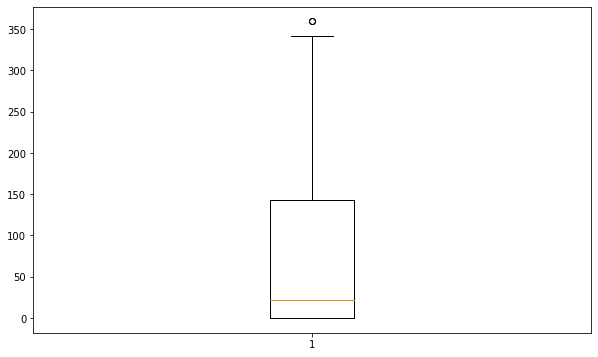

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(concrete['slag'])

* 모든 특성에 대해 outlier 확인 (seaborn 의 boxplot 이용)

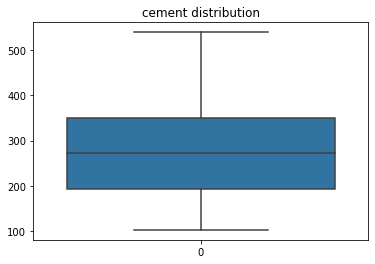

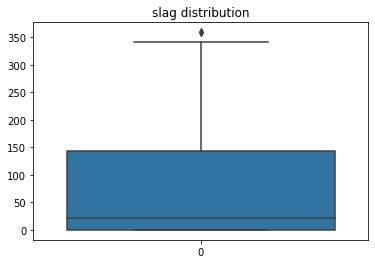

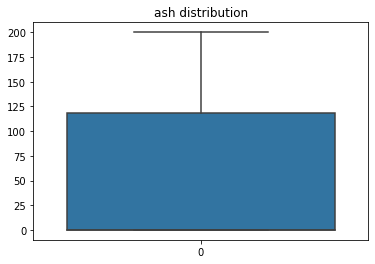

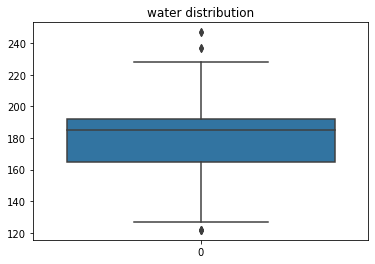

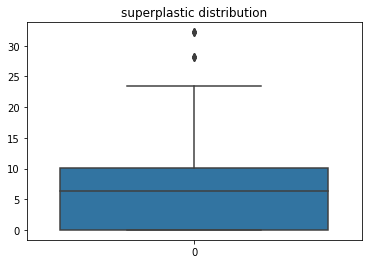

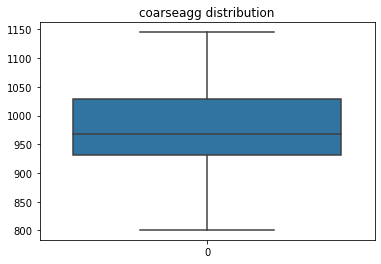

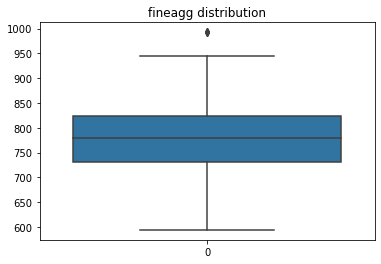

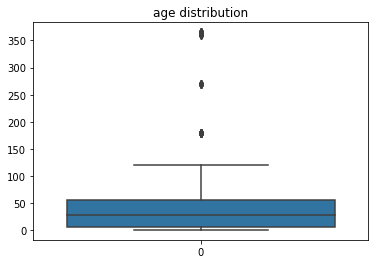

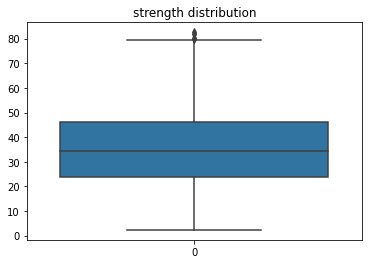

In [17]:
for i in concrete.columns:
    sns.boxplot(data=concrete[i]).set_title(i + ' distribution')
    plt.show()

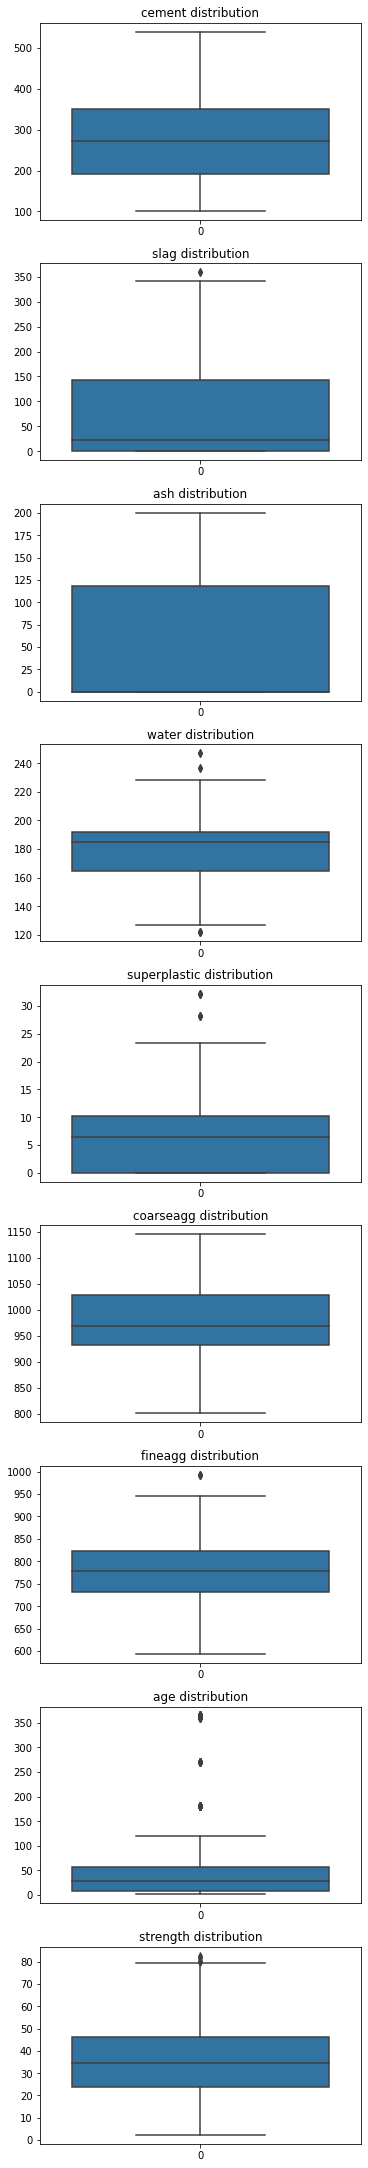

In [18]:
names = list(concrete.columns)

fig, axes = plt.subplots(len(names), 1, figsize=(5, 30), constrained_layout=True)

for i in range(len(names)):
    sns.boxplot(data=concrete[names[i]], ax=axes[i]).set_title(names[i] + ' distribution')

* 아웃라이어로 간주되는 부분 필터링(참고)

In [19]:
# concrete=concrete[concrete["slag"]<350]
# concrete=concrete[(concrete["water"]<246) & (concrete["water"]>122)]
# concrete=concrete[concrete["superplastic"]<25]
# concrete=concrete[concrete["fineagg"]<992]
# concrete=concrete[concrete["age"]<150]

- 참고) 위와 같이 아래와 같이 outlier를 제외한 부분만 슬라이싱 해도 됨

In [20]:
q1 = concrete['slag'].quantile(0.25)
q3 = concrete['slag'].quantile(0.75)
iqr = q3-q1
n=(concrete['slag']<q1-1.5*iqr)|(concrete['slag']>q3+1.5*iqr)
concrete[n]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.422359
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.435269


* 아래와 같이 outlier를 제외한 부분만 슬라이싱(전체 특성) [참고]

In [21]:
x = concrete.iloc[:,:-1]
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
iqr = q3 - q1
concrete.iloc[:,:-1] = x[(x >= q1-1.5*iqr) & (x <= q3+iqr*1.5)]
#concrete= concrete.fillna(concrete.median())

In [22]:
concrete.dropna(inplace=True)

* 아웃라이어들이 제거 되었음을 확인

In [23]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,945.000000,945.000000,945.00000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,276.255714,74.192011,57.77291,180.526561,6.262228,974.975291,776.264868,32.453968,35.083287
std,102.121900,86.580718,64.33716,18.789734,5.356791,77.688240,75.092246,28.572875,16.827756
min,102.000000,0.000000,0.00000,127.000000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.00000,164.900000,0.000000,932.000000,739.300000,7.000000,22.718234
50%,260.000000,20.000000,0.00000,183.800000,7.000000,968.000000,779.700000,28.000000,33.418902
75%,349.000000,145.000000,118.31000,192.000000,10.300000,1033.000000,822.200000,28.000000,45.084836
max,540.000000,342.100000,200.10000,228.000000,22.100000,1145.000000,945.000000,120.000000,82.599225


* 중복 데이터 확인하고 삭제하기

In [24]:
concrete.duplicated().sum()

25

In [25]:
concrete.duplicated().value_counts()

False    920
True      25
dtype: int64

In [26]:
concrete.drop_duplicates(inplace=True)

* 25개 삭제 되었음을 확인

In [27]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,273.351359,72.176576,59.342826,181.053261,6.076527,976.623750,775.363152,32.307609,34.443325
std,101.730901,86.475855,64.487271,18.726740,5.274854,77.450242,75.175200,28.447534,16.344159
min,102.000000,0.000000,0.000000,127.000000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,166.610000,0.000000,932.000000,736.900000,7.000000,22.435549
50%,253.250000,19.000000,0.000000,185.000000,6.710000,971.800000,780.000000,28.000000,33.202062
75%,337.900000,143.250000,118.700000,192.000000,10.000000,1040.000000,821.550000,28.000000,44.305728
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,82.599225


* 타겟 데이터를 제외한 특성 데이터만으로 plot 만들기
* (그래프를 통해 각 특성들의 범위가 다름을 알 수 있음)

In [28]:
data = concrete.iloc[:, :-1]

<AxesSubplot:>

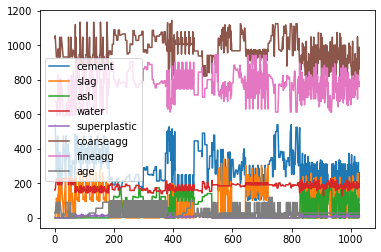

In [29]:
data.plot()

* 정규화, 표준화 작업하기

In [30]:
import numpy as np

In [31]:
def minmax_normalize(arr):
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr):
    return (arr - arr.mean())/arr.std()

* DataFrame의 apply 함수를 통해 정규화(normalize)
* 데이터가 0과 1사이의 범위로 변경되었음을 확인

In [32]:
concrete_mm = data.apply(minmax_normalize)

* 범위가 0~1사이로 바뀜

<AxesSubplot:>

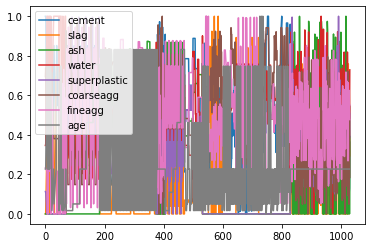

In [33]:
concrete_mm.plot()

* DataFrame의 apply 함수를 통해 표준화(standarize)
* 데이터의 평균이 0으로 맞추어졌음을 확인

In [34]:
concrete_zs = data.apply(zscore_standize)

<AxesSubplot:>

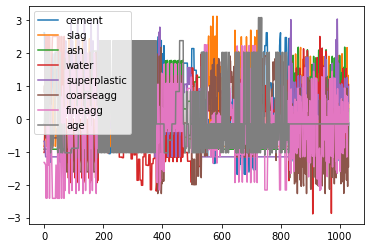

In [35]:
concrete_zs.plot()

In [36]:
concrete_zs

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,2.621117,-0.834644,-0.920225,-1.017436,-0.678033,0.818283,-1.321754,-0.151423
1,2.621117,-0.834644,-0.920225,-1.017436,-0.678033,1.011956,-1.321754,-0.151423
5,-0.072263,0.483643,-0.920225,2.506936,-1.151980,-0.576160,-1.401568,2.028028
7,1.048341,0.263928,-0.920225,2.506936,-1.151980,-0.576160,-2.412540,-0.151423
8,-0.072263,0.483643,-0.920225,2.506936,-1.151980,-0.576160,-1.401568,-0.151423
...,...,...,...,...,...,...,...,...
1025,0.029968,0.506771,0.480051,-0.077604,0.535270,-1.375383,-0.093956,-0.151423
1026,0.480175,-0.834644,0.872376,0.798150,0.819638,-2.049364,0.505976,-0.151423
1027,-1.227271,0.777366,0.763828,0.621931,0.004450,-1.087456,0.061681,-0.151423
1028,-1.123074,1.324340,-0.920225,-0.291202,0.990259,0.167543,0.180071,-0.151423


### 2. 모델 훈련

1. 특성과 레이블 준비
2. 훈련세트와 테스트세트 분리
3. linearRegression, DecisionTree, RandomForest 모델 훈련
4. 훈련 데이터로 성능 평가(RMSE)
5. 교차검증(모델 성능 비교)
6. 그리드 탐색 RandomForest : n_estimators (50, 100, 200) 파라미터 탐색
7. 최적의 모델로 예측 - 테스트 세트로 예측

* 특성과 레이블 준비

In [75]:
data = concrete_zs
label = concrete['strength'].copy()

* 훈련세트와 테스트세트 분리

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=42)

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(690, 8) (230, 8) (690,) (230,)


* 모델 훈련(훈련 데이터에 얼마나 잘 맞는지 보기 위해 예측을 훈련데이터로 해보기)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions = lin_reg.predict(X_train)
lin_rmse = mean_squared_error(y_train, lin_predictions, squared=False)
lin_rmse

8.124751067442897

In [81]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_predictions = tree_reg.predict(X_train)
tree_rmse = mean_squared_error(y_train, tree_predictions, squared=False)
tree_rmse

0.11569406911157692

In [82]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_predictions = forest_reg.predict(X_train)
forest_rmse = mean_squared_error(y_train, forest_predictions, squared=False)
forest_rmse

1.9527553640327073

* 교차 검증

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

8.243080313506038

In [85]:
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores.mean()

7.625578844925073

In [86]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean()

5.410040709676648

* 그리드 탐색

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_gid = [{'n_estimators':[50, 100, 200]}]

In [89]:
grid_search = GridSearchCV(forest_reg, param_gid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)

In [90]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [91]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=42)

In [92]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.771651045945889 {'n_estimators': 50}
5.713160401617031 {'n_estimators': 100}
5.639260850219295 {'n_estimators': 200}


* 최적 모델로 예측

In [95]:
final_model = grid_search.best_estimator_

In [96]:
final_predictions = final_model.predict(X_test)

In [97]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

5.4033989011861925

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_test, final_predictions)

0.8962555716453157

* concrete_mm

In [100]:
data2 = concrete_mm
label = concrete['strength'].copy()

X_train, X_test, y_train, y_test = train_test_split(data2, label, random_state=42)

In [101]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions = lin_reg.predict(X_train)
lin_rmse = mean_squared_error(y_train, lin_predictions, squared=False)
lin_rmse

8.124751067442897

In [102]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_predictions = tree_reg.predict(X_train)
tree_rmse = mean_squared_error(y_train, tree_predictions, squared=False)
tree_rmse

0.11569406911157692

In [103]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
forest_predictions = forest_reg.predict(X_train)
forest_rmse = mean_squared_error(y_train, forest_predictions, squared=False)
forest_rmse

1.951471096434136

In [104]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

8.243080313506038

In [105]:
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores.mean()

7.62071574106386

In [106]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean()

5.408907992867563

In [107]:
grid_search = GridSearchCV(forest_reg, param_gid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)

In [108]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [109]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=42)

In [110]:
final_model = grid_search.best_estimator_

In [111]:
final_predictions = final_model.predict(X_test)

In [112]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

5.4092555207288875

In [113]:
r2_score(y_test, final_predictions)

0.8960305573774607